# Energy Appliance Preprocessing.

In this paper, there are using a univariate time series dataset (e.g. the Appliance comsumption.). So we will focus our preprocessing in the "Appliance" column.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.utils import data_helpers
from src.utils import utils

2024-12-13 08:30:38.073140: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-13 08:30:38.156285: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734075038.201737 3136428 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734075038.214250 3136428 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-13 08:30:38.311834: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
SAVE_FOLDER = "data/energy/preprocessed"

In [3]:
df = pd.read_csv("data/energy/energydata_complete.csv")

df['date'] = pd.to_datetime(df['date'])
df = df.set_index(["date"])

df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df.shape

(19735, 28)

<Axes: title={'center': 'Visualization of Appliance Data'}, xlabel='date'>

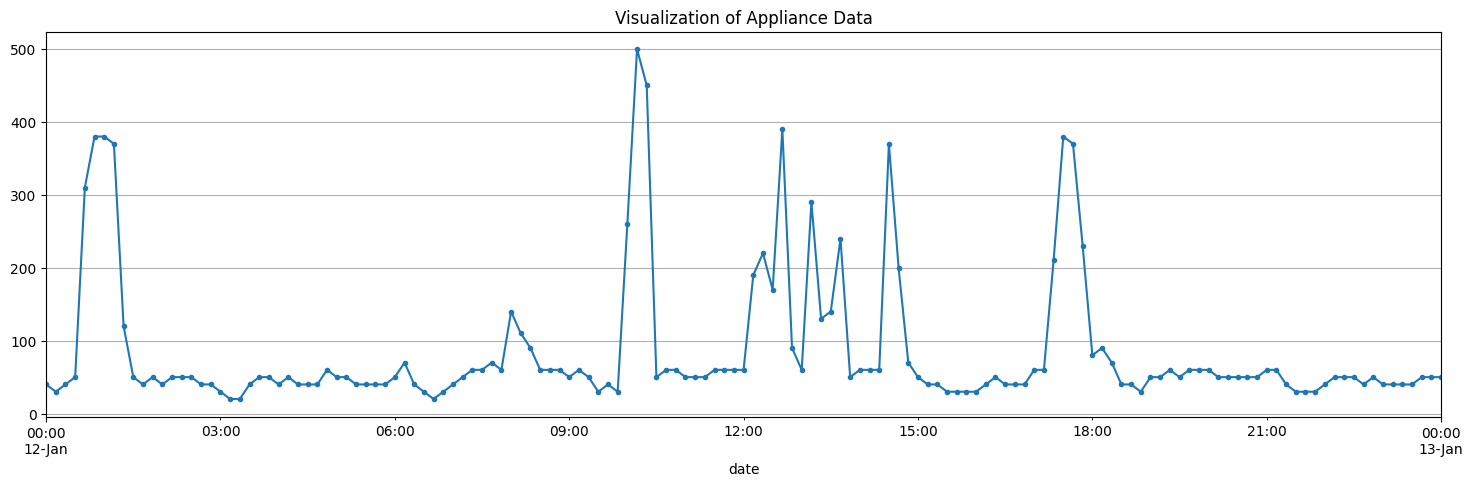

In [4]:
df.loc["2016-01-12":"2016-01-13 00:00:00"]["Appliances"].plot(figsize=(18, 5), grid=True, title='Visualization of Appliance Data', style=".-")

In [5]:
normalized_dataset = data_helpers.standardize(df["Appliances"])

In [6]:
normalized_dataset

date
2016-01-11 17:00:00   -0.367666
2016-01-11 17:10:00   -0.367666
2016-01-11 17:20:00   -0.465204
2016-01-11 17:30:00   -0.465204
2016-01-11 17:40:00   -0.367666
                         ...   
2016-05-27 17:20:00    0.022483
2016-05-27 17:30:00   -0.075055
2016-05-27 17:40:00    1.680617
2016-05-27 17:50:00    3.143676
2016-05-27 18:00:00    3.241213
Name: Appliances, Length: 19735, dtype: float64

<Axes: title={'center': 'Visualization of Appliance Data'}, xlabel='date'>

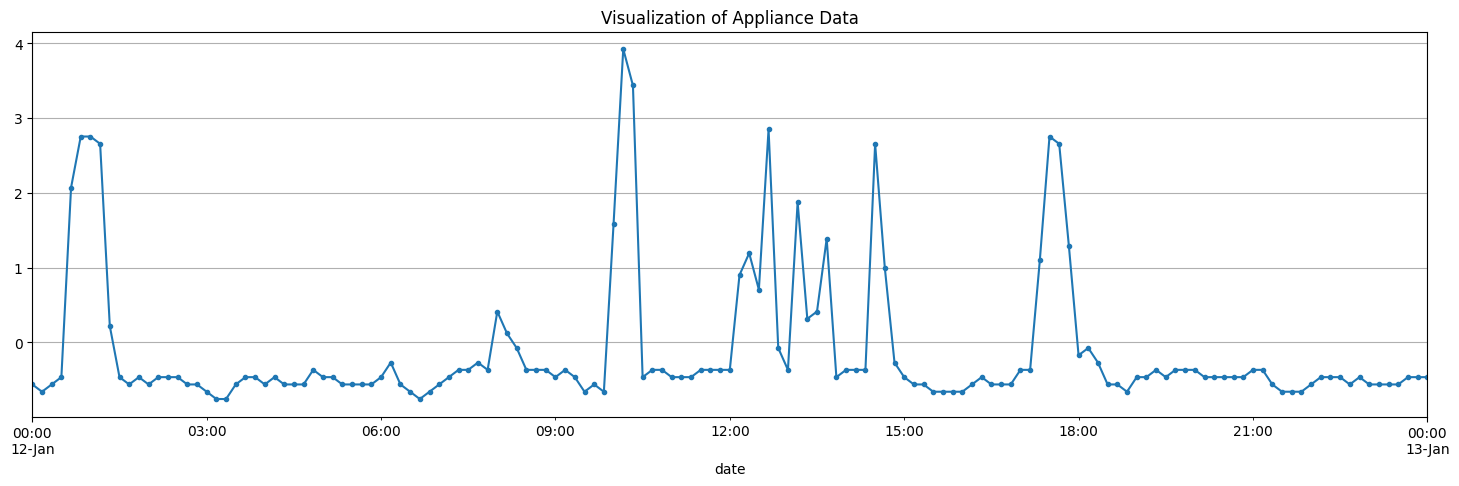

In [7]:
normalized_dataset.loc["2016-01-12":"2016-01-13 00:00:00"].plot(figsize=(18, 5), grid=True, title='Visualization of Appliance Data', style=".-")

# Make "In Sample" Dataset.

### Style Dataset 

In [8]:
style_sequences = data_helpers.make_dataset(normalized_dataset.values)

style_train, style_test = data_helpers.train_test_split(style_sequences)

# np.save(f"{SAVE_FOLDER}/style_train.npy", style_train)
# np.save(f"{SAVE_FOLDER}/style_test.npy", style_test)

### "In Sample" Dataset.

In [9]:
rng = np.random.default_rng() # Applying the new numpy Generator.

in_sample_train = rng.permutation(style_train)
in_sample_test = rng.permutation(style_test)


in_sample_train.shape
# np.save(f"{SAVE_FOLDER}/in_sample_train.npy", in_sample_train)
# np.save(f"{SAVE_FOLDER}/in_sample_test.npy", in_sample_test)

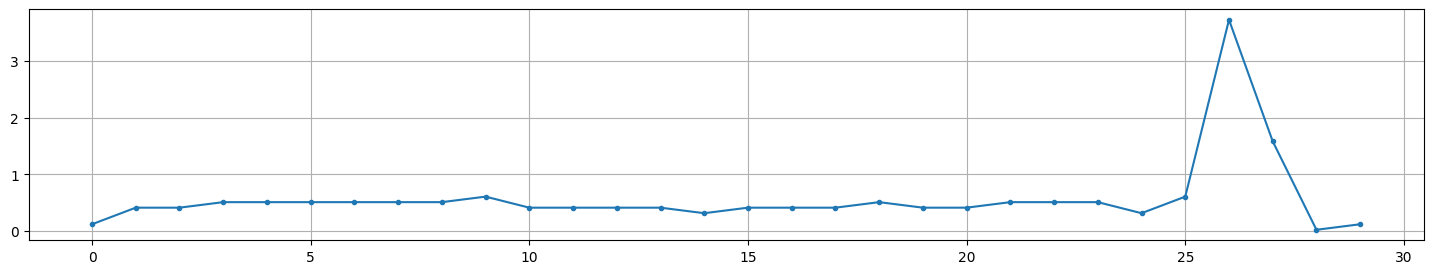

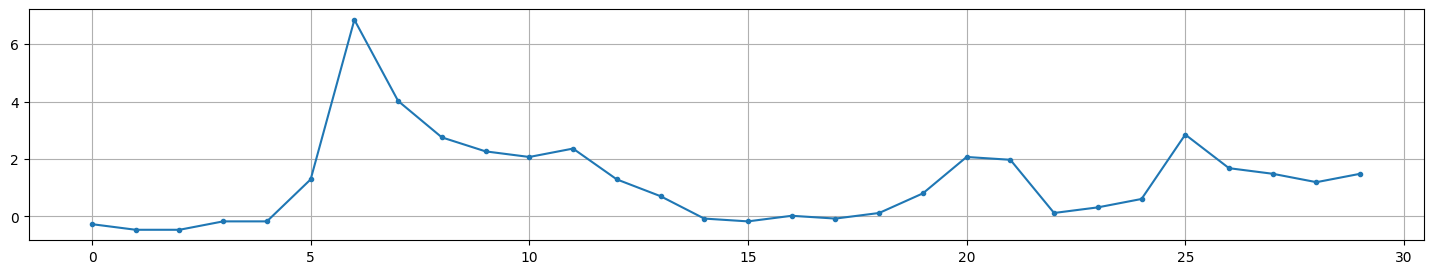

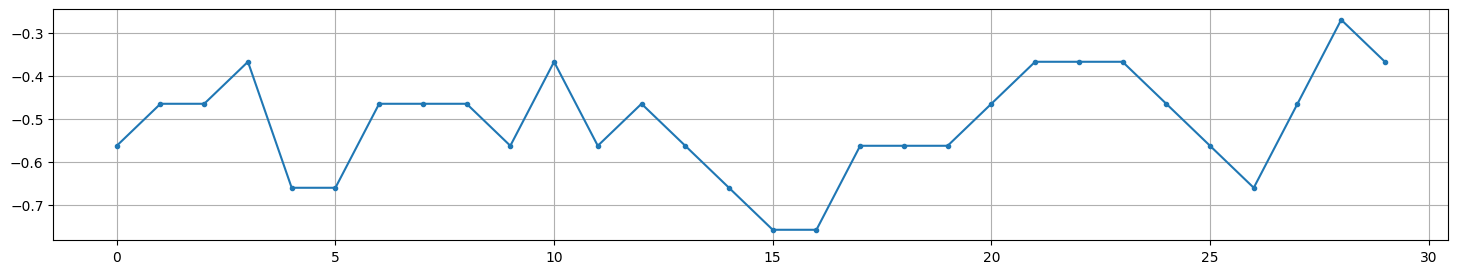

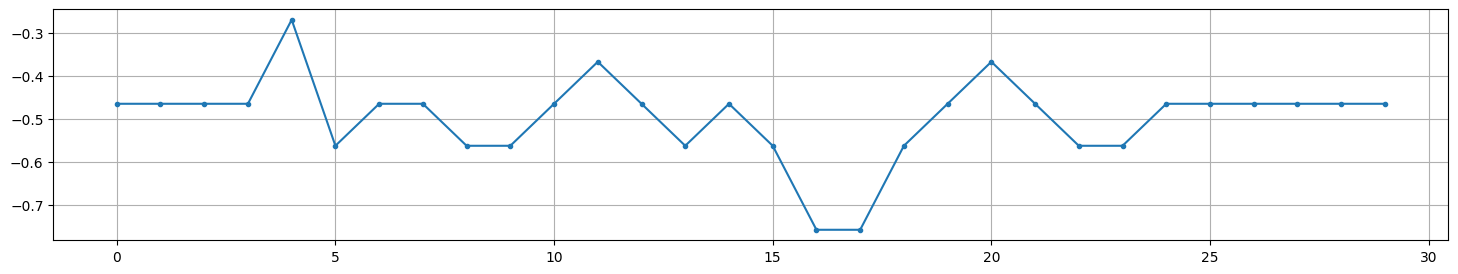

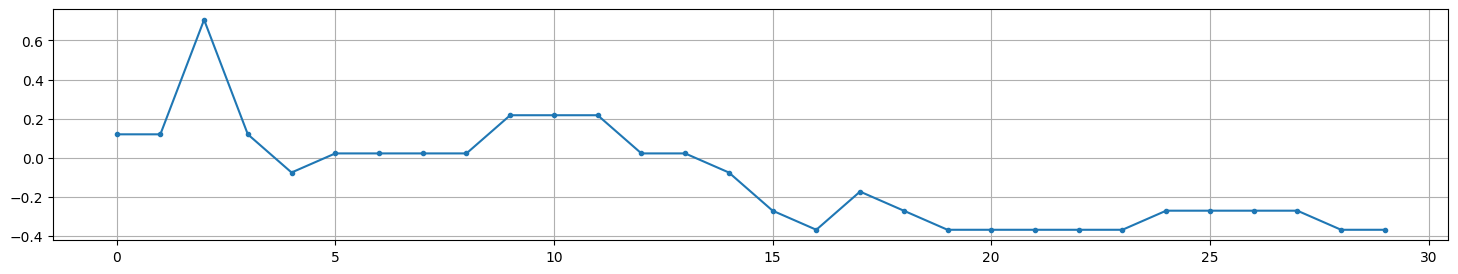

In [10]:
utils.plot_several_sequence(in_sample_train, 5)

### "Perturbed" Dataset.

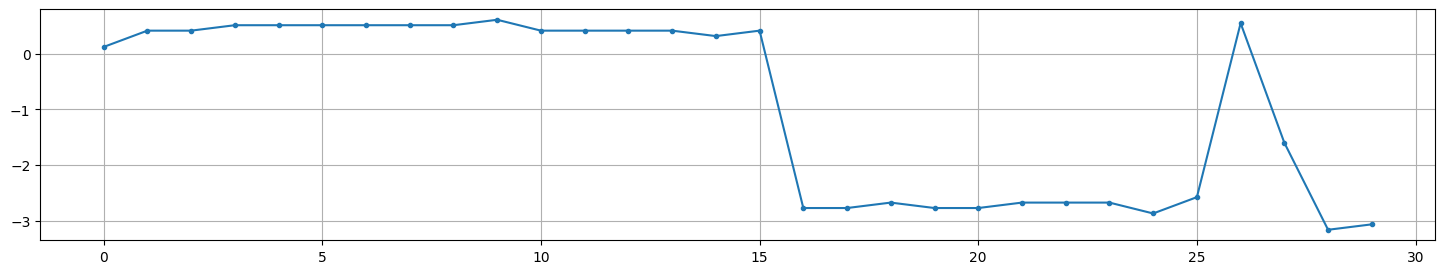

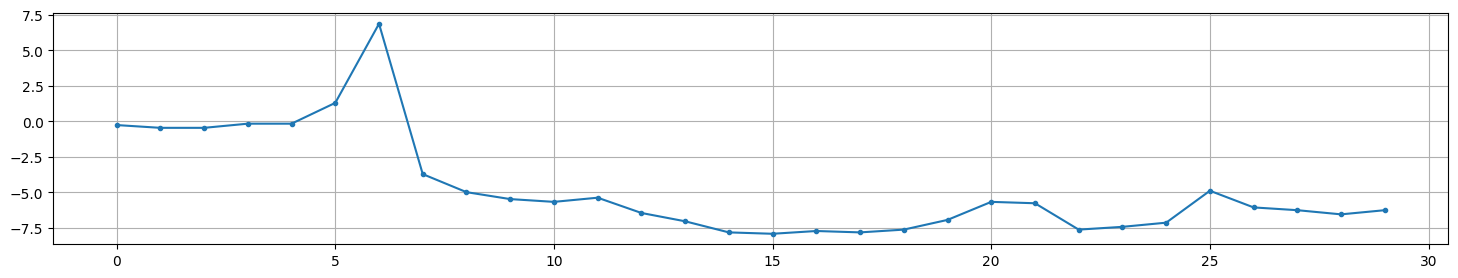

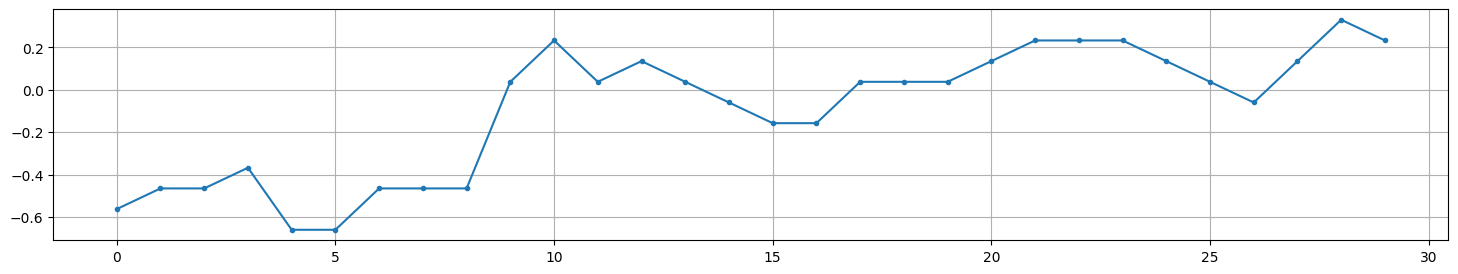

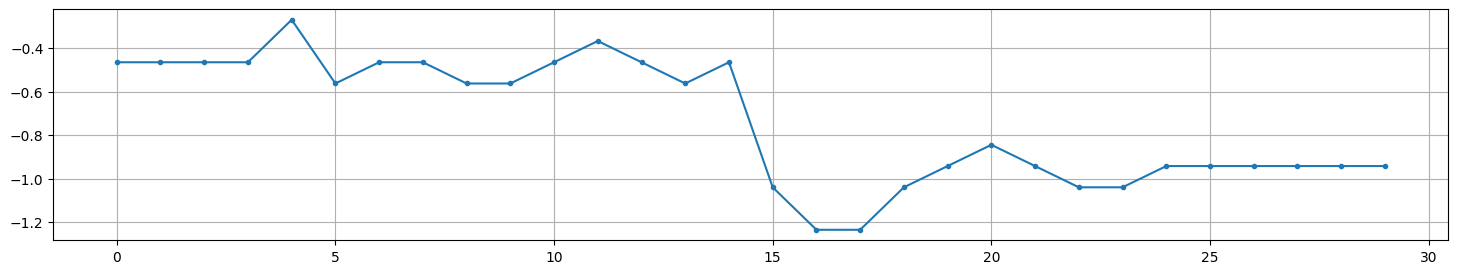

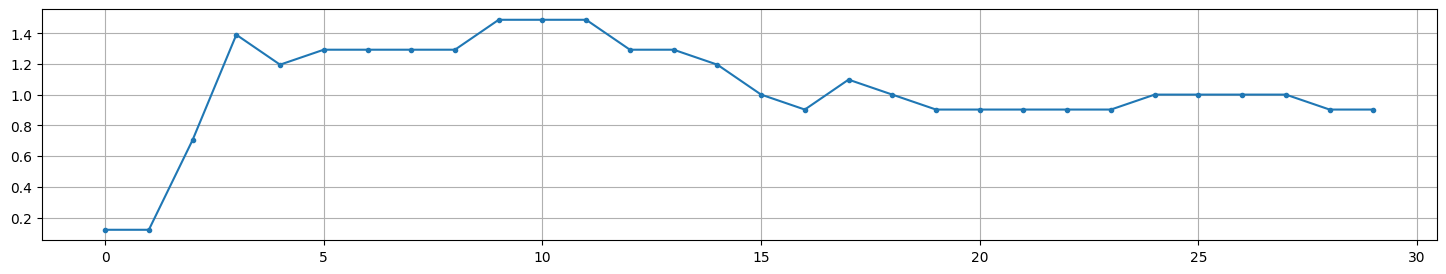

In [11]:
perturbed_train = data_helpers.make_perturbed_dataset(in_sample_train)
perturbed_test = data_helpers.make_perturbed_dataset(in_sample_test)

np.save(f"{SAVE_FOLDER}/perturbed_train.npy", perturbed_train)
np.save(f"{SAVE_FOLDER}/perturbed_test.npy", perturbed_test)

utils.plot_several_sequence(perturbed_train, 5)